In [1]:
import pandas as pd

df = pd.read_csv("../../data/processed/clean.csv")

### 2.1 view counts of labels

In [2]:
df['label'].value_counts()

label
0    2391
1     440
Name: count, dtype: int64

### 2.2 visualize distribution as pie chart

([<matplotlib.patches.Wedge at 0x7f88bde2d150>,
 [Text(-0.9714587958381871, 0.5160114417225841, 'not sustainable'),
  Text(0.971458819994425, -0.5160113962453152, 'sustainable')],
 [Text(-0.5298866159117384, 0.2814607863941367, '84.46'),
  Text(0.5298866290878681, -0.28146076158835376, '15.54')])

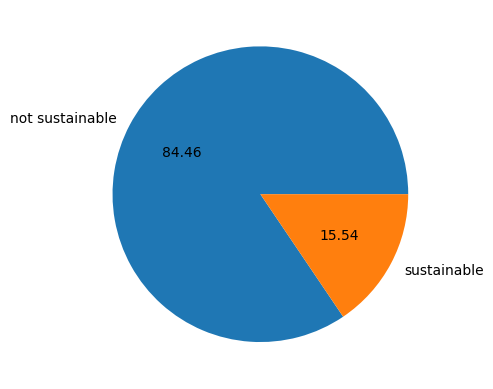

In [5]:
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels=['not sustainable', 'sustainable'], autopct="%0.2f")

### data is imbalanced

In [9]:
import nltk
!pip3 install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/capeta/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.3 get number of characters per text

In [12]:
df['num_of_chars'] = df['text'].apply(len)
df.head(3)

,id,text,label,num_of_chars
0,5b133284a6da98dccdde5f03,high quality and perfection are the result of...,0,905
1,556d34fd7369641226dab000,best ham in the world​- iffa international fra...,0,839
2,5e57ea61d5bd4a000176bd7c,"el mundo necesita gente como la aguacatera, qu...",0,72


### 2.4 get number of words in text

In [13]:
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(3)

,id,text,label,num_of_chars,num_of_words
0,5b133284a6da98dccdde5f03,high quality and perfection are the result of...,0,905,155
1,556d34fd7369641226dab000,best ham in the world​- iffa international fra...,0,839,150
2,5e57ea61d5bd4a000176bd7c,"el mundo necesita gente como la aguacatera, qu...",0,72,13


### 2.5 get number of sentences in text

In [14]:
df['num_of_sents'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(3)

,id,text,label,num_of_chars,num_of_words,num_of_sents
0,5b133284a6da98dccdde5f03,high quality and perfection are the result of...,0,905,155,2
1,556d34fd7369641226dab000,best ham in the world​- iffa international fra...,0,839,150,3
2,5e57ea61d5bd4a000176bd7c,"el mundo necesita gente como la aguacatera, qu...",0,72,13,1


all labels

In [15]:
df[['num_of_chars', 'num_of_words', 'num_of_sents']].describe()

,num_of_chars,num_of_words,num_of_sents
count,2831.000000,2831.000000,2831.000000
mean,821.509007,129.057930,3.419640
std,530.200445,84.981841,2.390164
min,11.000000,1.000000,1.000000
25%,402.000000,62.000000,2.000000
50%,735.000000,115.000000,3.000000
75%,1159.000000,180.000000,5.000000
max,3060.000000,616.000000,31.000000


label 0 stats

In [17]:
df[df['label'] == 0][['num_of_chars', 'num_of_words', 'num_of_sents']].describe()

,num_of_chars,num_of_words,num_of_sents
count,2391.000000,2391.000000,2391.000000
mean,793.673358,124.934755,3.347972
std,521.641436,83.726557,2.356908
min,11.000000,1.000000,1.000000
25%,382.500000,59.500000,2.000000
50%,711.000000,111.000000,3.000000
75%,1127.000000,176.000000,4.000000
max,3060.000000,616.000000,31.000000


label 1 stats

In [18]:
df[df['label'] == 1][['num_of_chars', 'num_of_words', 'num_of_sents']].describe()

,num_of_chars,num_of_words,num_of_sents
count,440.000000,440.000000,440.000000
mean,972.770455,151.463636,3.809091
std,551.011081,88.292502,2.530886
min,40.000000,7.000000,1.000000
25%,550.750000,82.750000,2.000000
50%,895.000000,137.500000,3.000000
75%,1345.250000,207.000000,5.000000
max,2522.000000,376.000000,17.000000


### 2.6 more visualizations

<Axes: xlabel='num_of_chars', ylabel='Count'>

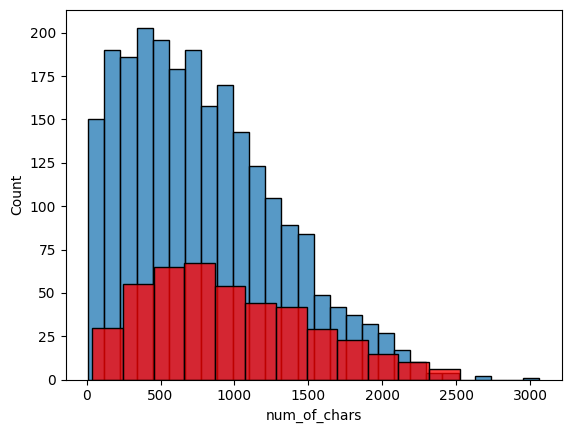

In [49]:
import seaborn as sns

sns.histplot(df[df['label'] == 0]['num_of_chars'])
sns.histplot(df[df['label'] == 1]['num_of_chars'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

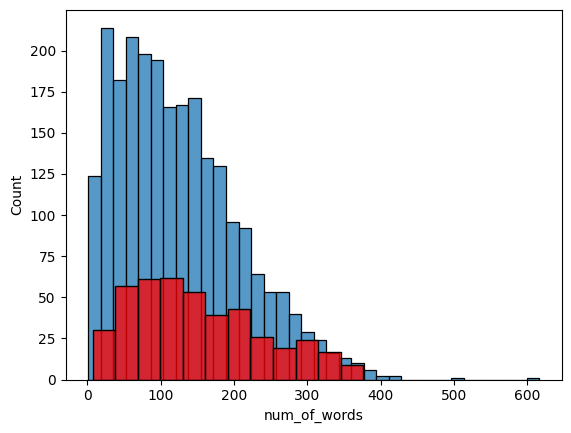

In [22]:
sns.histplot(df[df['label'] == 0]['num_of_words'])
sns.histplot(df[df['label'] == 1]['num_of_words'], color='red')

<Axes: xlabel='num_of_sents', ylabel='Count'>

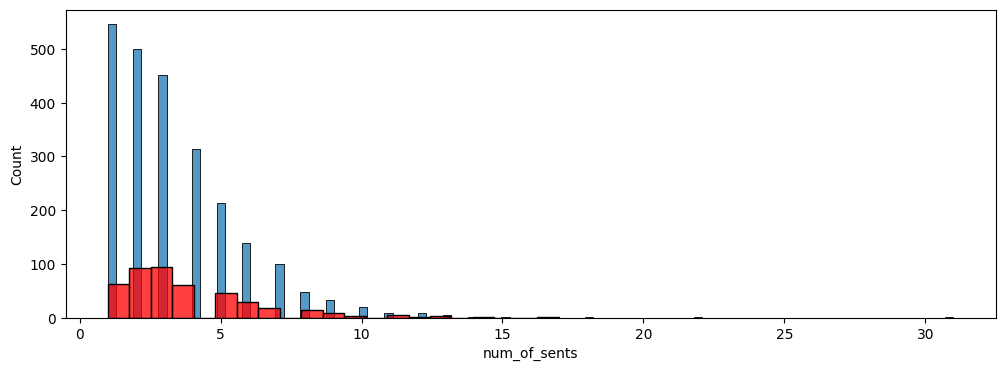

In [46]:
plt.figure(figsize=(12, 4))
sns.histplot(df[df['label'] == 0]['num_of_sents'])
sns.histplot(df[df['label'] == 1]['num_of_sents'], color='red')

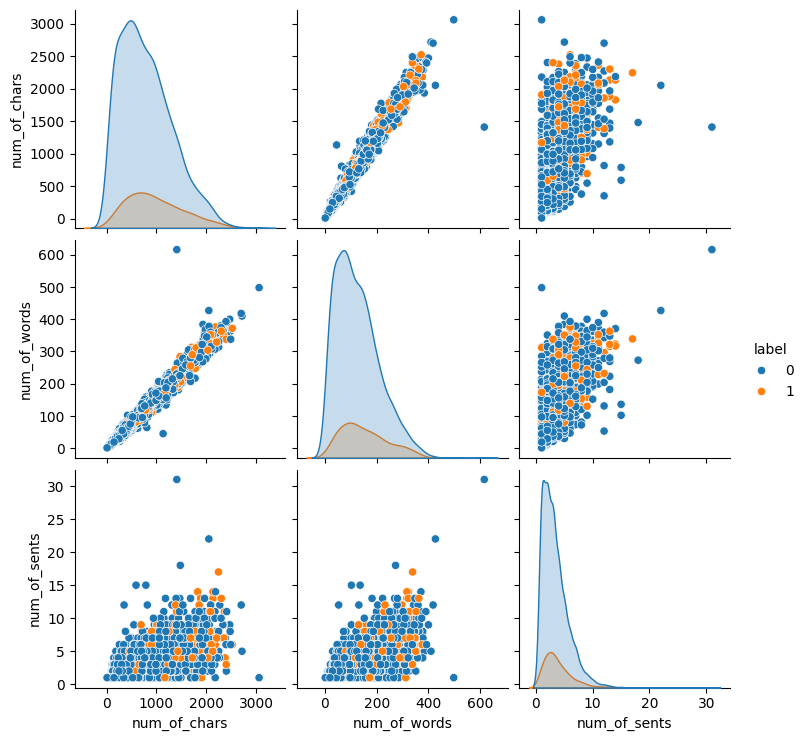

In [47]:
sns.pairplot(df, hue='label')